<a href="https://colab.research.google.com/github/baldevoli/git_test/blob/main/Part2_Perceptron_with_GD_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> Courtesy: This assignment has been updated and modified from an original assignment of Dr. Tim Oates</h3>

<h4> Any sort of collaboration and external help should be explicitly mentioned in your submission.</h4>

In [202]:
import math
import numpy as np
import matplotlib.pyplot as plt

<h2>Homework 1</h2>

<p>In this assignment, you will implement a numerical approach to gradient descent and use it to develop the perceptron algorithm. This process will be broken down into several stages, as described below. First, we'll explore how to perform gradient descent numerically.</p>

<h3>The Method of Finite Differences</h3>

<p>Given a function <i>f(x)</i>, the analytical approach to gradient descent—i.e., finding the value of <i>x</i> that minimizes <i>f(x)</i>—involves computing <i>f'(x)</i> and iterating as follows, where <i>α ∈ (0, 1]</i> is the learning rate:</p>

<pre>
x = 0
while not converged:
    x = x - α * f'(x)
</pre>

<p>If you cannot compute <i>f'(x)</i> analytically, you can estimate it using the finite difference method, which is expressed as follows for a sufficiently small <i>ε</i>:</p>

<pre>
f'(x) ≈ (f(x + ε) - f(x - ε)) / (2ε)
</pre>

<p>The finite difference method assumes that over very small intervals, the function behaves linearly. Therefore, the slope of the tangent line can be estimated as the difference between the function values at the ends of the interval divided by the interval width.</p>

<p>For example, the slope of <i>f(x) = x²</i> at <i>x = 1</i> can be estimated as:</p>

<p>
f'(1) = <sup>((1 + 0.001)² - (1 - 0.001)²)</sup> / <sub>(2 * 0.001)</sub>
</p>



In [203]:
e = 0.001
(math.pow(1 + e, 2) - math.pow(1 - e, 2))/(2*e)

1.9999999999998352

<p>Note that the number above is very close to what you would get analytically by taking derivatives:</p>

<pre>
f'(x) = 2x
so
f'(1) = 2 * 1 = 2
</pre>

<p>You'll use the method of finite differences to compute the derivative of a loss function with respect to the weights of a perceptron.</p>

<p>Below is a simple implementation of the method of finite differences for a univariate function. It is overly simple, running for a fixed number of iterations, and assuming constants for <i>ε</i> and <i>α</i>, but it works for simple cases.</p>


In [204]:
def fd_demo(f, x0):
    e = 0.001
    a = 0.01
    x = x0
    for _ in range(1000):
        g = (f(x + e) - f(x - e)) / (2*e)
        x = x - a * g
    return x

In [205]:
# x*x is minimized at 0
f = lambda x: x * x
fd_demo(f, 2)

3.365934714445534e-09

In [206]:
# sin(x) is minimized at lots of points, the closest to 2 is 3pi/2
f = lambda x: math.sin(x)
print(fd_demo(f, 2))
print(math.pi * 3 / 2)

4.711986618234112
4.71238898038469


<h3>Perceptron Class</h3>

<p>Below is a simple <code>Perceptron</code> class that you can use in this assignment. Feel free to use it as is, make changes, or write your own from scratch. This class initializes a weight vector with small random numbers and includes methods to compute the activation for an input and to produce a binary class label for an input.</p>

<p>Note that the class below does not maintain an explicit bias term <i>b</i>. You can add one or, better yet, ensure that all inputs, <i>x</i>, have a 1 in one of the positions.</p>


In [207]:
class Perceptron:

    def __init__(self, n):
        """
        n (int) - The length of x vectors that the classifier will process.
        """

        # Start with weights uniformly chosen from the range [-0.5, 0.5]
        self.weights = (np.random.rand(n) - 0.5).tolist()

    def activation(self, x):
        return np.dot(x, self.weights)

    def predict(self, x):
        return 1 if self.activation(x) > 0 else -1


<h3>Task 1: The Perceptron Loss</h3>

<p>Fill in the function below to compute the perceptron loss. Recall that the perceptron loss is 0 if the activation and the class label have the same sign; otherwise, it is <code>-y * activation</code>.</p>


In [208]:
def loss_perceptron(y, activation):
  #if the predicted lable as same as true lable it ruturns 0
  # else -y * activation
    return max(0, -y * activation)

<h3>Task 2: One Step of Gradient Descent</h3>

<p>Fill in the function below, which takes the following arguments:</p>

<ul>
    <li><code>clf</code> - An instance of the perceptron class above</li>
    <li><code>x</code> - A training instance</li>
    <li><code>y</code> - The corresponding true class label</li>
    <li><code>learning_rate</code> - A learning rate in the range (0, 1]</li>
    <li><code>loss_fn</code> - A function that takes as input the true class label and the activation and returns a real number which is the loss on that example</li>
    <li><code>epsilon</code> - The delta to use when using the method of finite differences</li>
</ul>

<p>The function must return a new set of weights to use in the perceptron after performing one step of gradient descent update using the training example and loss function. To do that, it will:</p>

<ol>
    <li>Loop over each of your weights. Think how you can access it from one of your parameters.</li>
    <li>Compute the partial derivative of the loss with respect to the weight using the method of finite differences</li>
    <li>Use the computed gradient (the list of partials with respect to each of the weights) to compute a new weight vector as <code>w = w - α * g</code>, where <code>w</code> is the weight vector, <code>α</code> is the learning rate, and <code>g</code> is the computed gradient.</li>
    <li>Return the new weight vector</li>
</ol>

<p><strong>Note:</strong> Be careful not to modify the weights of the perceptron in place in the routine below.</p>


In [209]:
def gd_step(clf, x, y, learning_rate, loss_fn, epsilon = 0.001):

  new_weights = clf.weights[:] #make the shallow copy the current weight
  # w = (W1,W2,.....Wn)


  orginal_loss = loss_fn(y, clf.activation(x))
  #compute the loss function with activation and true lable y


  for i in range(len(clf.weights)): # compute the derivation for all W

    weight_plus = clf.weights[:] # copy the weight
    weight_plus[i] += epsilon  # Wi = Wi + E

    weight_minus = clf.weights[:] # copy the weight
    weight_minus[i] -= epsilon     # Wi = Wi - E


    #compute the activation for the loss function with the modified weight with the input  x
    #(f(w + E ) and f(w - E))
    activation_p = np.dot(x, weight_plus)
    activation_m = np.dot(x, weight_minus)

    #calculate the loss for the both positive and the negative sctivations
    # using the formuls loss function f((f(w + E ), y) and f((f(w - E ), y)
    loss_p = loss_fn(y, activation_p)  #loss when weight increases
    loss_m = loss_fn(y, activation_m)  #loss wehn weight decreases

    gradient = (loss_p - loss_m) / (2 * epsilon)  #finite difference method
    # f(x) = f(w + E ) - (f(w - E ) / 2E

    # gradient descent rule w = w - a * g
    new_weights[i] = new_weights[i] - learning_rate * gradient

  return new_weights




<h3>Some Training Data</h3>

<p>The code below generates a simple 2D dataset of <code>n</code> positive examples followed by <code>n</code> negative examples. The cell after that plots them. The code also prepends a 1 in each example so that the bias term will simply correspond to the first weight.</p>

In [210]:
n = 10
X = np.concatenate((np.random.rand(n, 2) + 1,
                    np.random.rand(n, 2)))
X = np.hstack((np.expand_dims(np.ones(2*n), 1), X))
Y = [1] * n + [-1] * n
colors = c = ['r'] * n + ['g'] * n

# Randomize the order of the instances just for fun
rng = np.random.default_rng()
state = rng.__getstate__()
rng.shuffle(X)
rng.__setstate__(state)
rng.shuffle(Y)
rng.__setstate__(state)
rng.shuffle(colors)

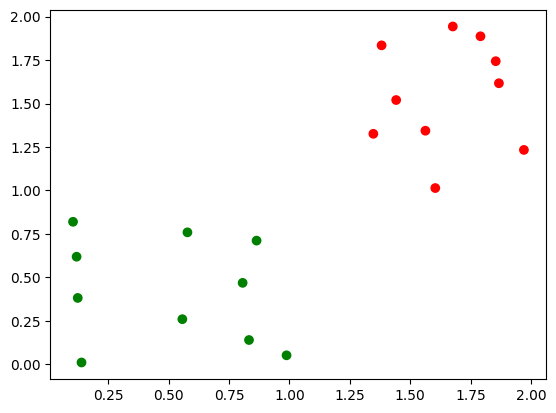

In [211]:
plt.scatter(X[:,1], X[:,2], c = colors)

<h3>Task 3: Full Gradient Descent</h3>

<p>If you've done everything above correctly, the code below will perform gradient descent to train the classifier.</p>

<p>Modify this code so that it runs until one epoch produces no classification errors rather than running for a fixed number of iterations.</p>


In [212]:
clf = Perceptron(3)

for epoch in range(100):
    errors = 0
    for x, y in zip(X, Y):

      activation = np.dot(x, clf.weights) # calculate the activation
      if y * activation <= 0:  # if predication is incorrect
        clf.weights = gd_step(clf, x, y, 0.01, loss_perceptron) # update the weight usind GD
      errors += 1 # increment the error
    if errors == 0: # if there is no error break the loop
         break
print(clf.weights)



[-0.1772409212120476, -0.01087428162077446, 0.2126596807875074]


<h3>Task 4: Plot Some Hyperplanes</h3>

<p>Run full gradient descent 5 times and write a routine to convert the weights into slope/intercept form. Then use the 'abline' function to plot the hyperplanes learned by the perceptron along with the data in one graph. The second cell below shows how that can be done.</p>

**Observation:**
<p>Write a paragraph explaining what you see in the plot, discussing how much variation there is from run to run and whether the separators seem like "good" ones. Define "good" in terms of this problem.</p>

<p>
After running the test for the multiple time I can see the model is doing well, but on some test it toches the dots, which means it is not perfect yet. But on average the model works good, meand it is able to separate the dots almost from the middle of the points.
</p>


In [213]:
def weights_to_slope_intercept(weights):
    w0, w1, w2 = weights  # the genereal eqn of the line w0 + w1.x + w2.y = 0
    slope = -w1 / w2 # slope of the line
    intercept = -w0 / w2  # interception of the line

    return slope, intercept

In [214]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

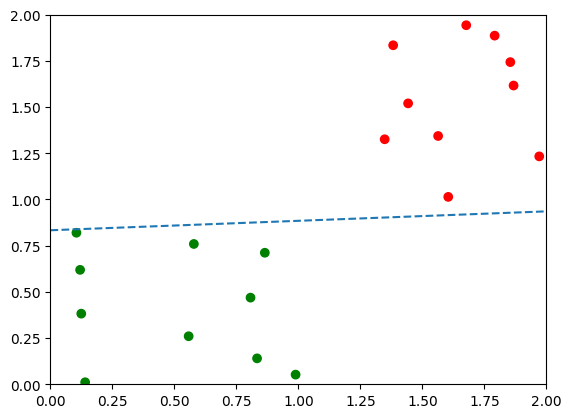

In [215]:
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.scatter(X[:,1], X[:,2], c = colors)
#abline(-1, 2)
#abline(2, 0)
slope, intercept = weights_to_slope_intercept(clf.weights) # convert the weights to the slope
abline(slope, intercept)

<h3>Task 5: Do Task 4 Again with a New Loss</h3>

<p>Repeat task 4, generating 5 plots of the separators corresponding to hyperplanes, but this time use the loss function below instead of perceptron loss above.</p>

**Observation:**<p>How are the results different? Why does the results look different?</p>

<p>
The new loss function will make the model to saperate the data points right from the middle and keep the line farther away from the data points.

The previous loss function was only separating the red and the green dots but now the new function is making sure that the distance with the decision boundary is far enough. As we can see on the plots that on 4 previous plots the line is touching the data points and in one it is far away, but at the last plot the decision boundry looks almost perfect and the line looks like having the proper distance between the different data sets.

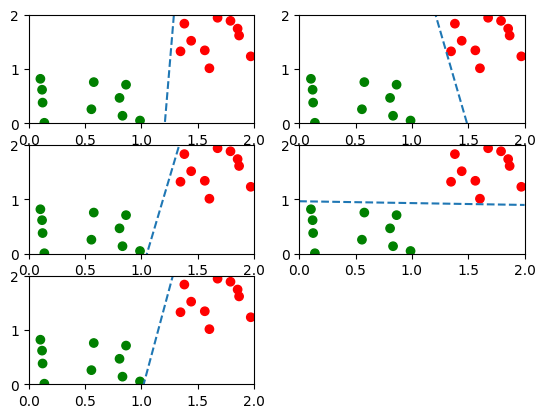

In [218]:
def loss_perceptron_margin(y, activation):
    return 0 if y * activation > 1 else -y * activation + 1


for i in range(5):  #loop for  5 times to generate different plots

    clf = Perceptron(3)

    for epoch in range(100):
        errors = 0
        for x, y in zip(X, Y):
            activation = np.dot(x, clf.weights) # calculate the activation
            if y * activation <= 0:  # if predication is incorrect
                clf.weights = gd_step(clf, x, y, 0.01, loss_perceptron_margin) # update the weight usind GD
                errors += 1 # increment the error
        if errors == 0: # if there is no error break the loop
            break


    plt.subplot(3, 2, i+1)  #subplot for each of the 5 plots
    plt.xlim([0, 2])
    plt.ylim([0, 2])
    plt.scatter(X[:,1], X[:,2], c = colors) # Scatter plot the data points

    # plot the decision boundary
    slope, intercept = weights_to_slope_intercept(clf.weights)
    abline(slope, intercept)


<h3> Bonus Task 6: Multi-Class Perceptron</h3>

Implement a variation of the perceptron algorithm that works for a dataset with more than two classes. Did you need to modify the weight update rule. If yes, how did you do it?